In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df = df[df['ignore'] == False]
df['time_in_secs'] = df['time'].apply(lambda x: x.split(':')).apply(lambda x:int(x[0])* 360 + int(x[1])* 60 + int(x[2]))

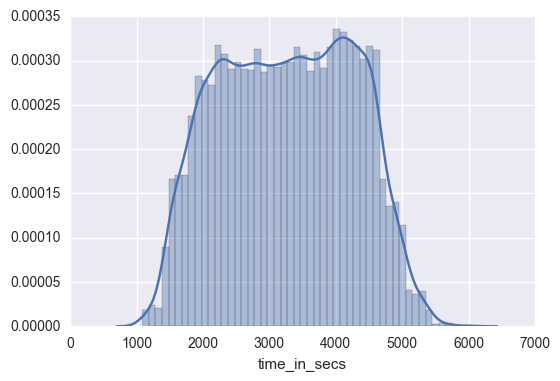

In [3]:
sns.distplot(df.time_in_secs)

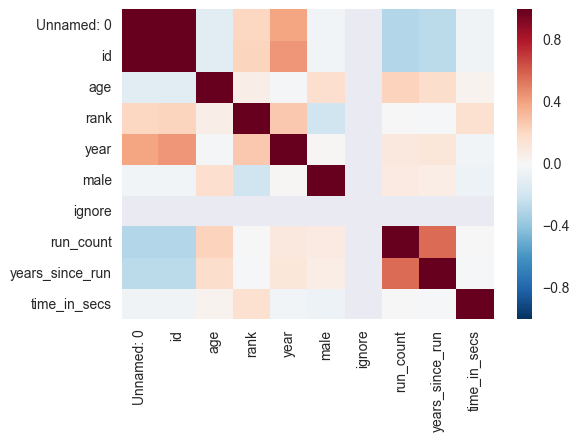

In [4]:
sns.heatmap(df.corr())

In [7]:
df_2years = df[(df.year != 2013) & (df.year < 2016) & (df.year > 2011) ]

In [10]:
df_2years.count()

Unnamed: 0         9247
id                 9247
name               9247
age                9247
rank               9247
time               9247
pace               9247
year               9247
male               9247
ignore             9247
run_count          9247
years_since_run    9247
time_in_secs       9247
dtype: int64

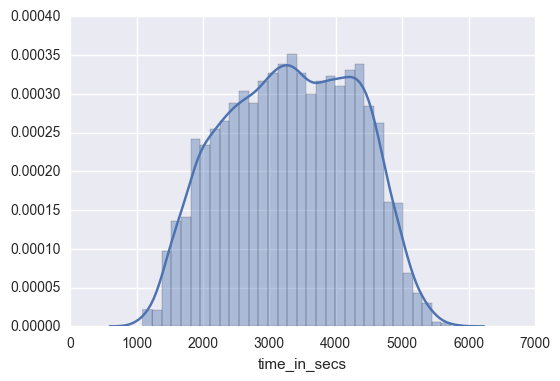

In [11]:
sns.distplot(df_2years.time_in_secs) # we can see it gives a nicer normal distrubution

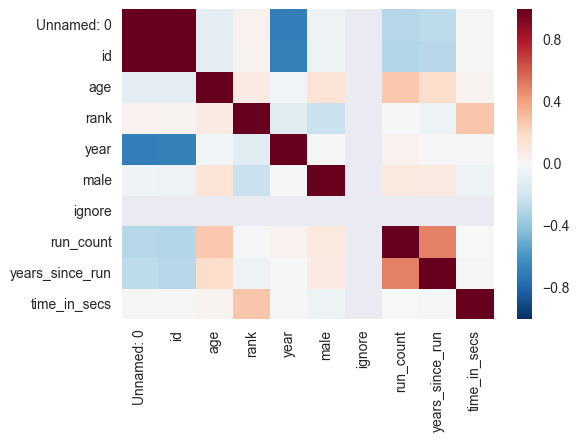

In [12]:
sns.heatmap(df_2years.corr())

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_2years[['age', 'rank','run_count']]
y = df_2years['time_in_secs']
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state = 101)
lm  = LinearRegression()
lm.fit(X_train,y_train)
# create df out of coeffecients
cdf = pd.DataFrame(lm.coef_ , X_train.columns , columns = ['Coeff'])
#predict
predictions = lm.predict(X_test)
cdf

,Coeff
age,1.536635e-14
rank,2.044863e-16
run_count,-2.672179e-13
time_in_secs,1.000000e+00


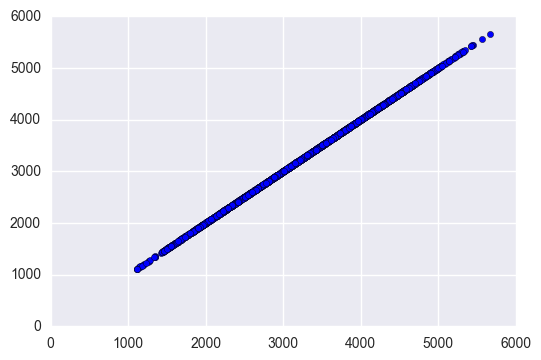

In [22]:
plt.scatter(y_test , predictions)

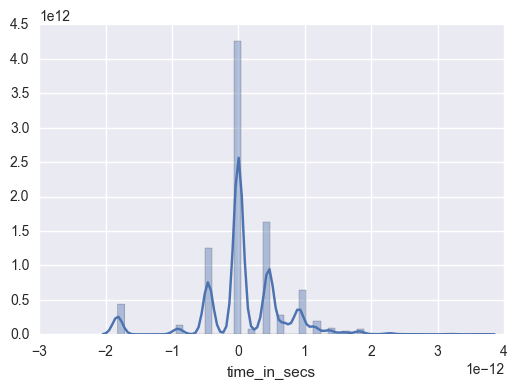

In [23]:
sns.distplot((y_test - predictions))

In [24]:
df_4years = df[(df.year != 2013) & (df.year < 2016) & (df.year > 2011) ]
df_2016 = df[df.year == 2016]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_4years[['age', 'rank','run_count','time_in_secs']]
y = df_4years['time_in_secs']
#X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state = 101)

X_train = df_4years[['age', 'rank','run_count','time_in_secs']]
X_test = df_2016[['age', 'rank','run_count','time_in_secs']]
y_train = df_4years['time_in_secs']
y_test = df_2016['time_in_secs']

lm_2  = LinearRegression()
lm_2.fit(X_train,y_train)
# create df out of coeffecients
cdf = pd.DataFrame(lm_2.coef_ , X_train.columns , columns = ['Coeff'])
#predict
predictions = lm_2.predict(X_test)
cdf

,Coeff
age,-7.182713e-15
rank,2.229517e-16
run_count,2.031853e-13
time_in_secs,1.000000e+00


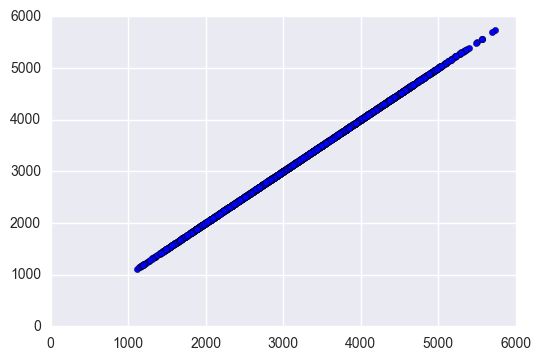

In [26]:
plt.scatter(y_test , predictions)

In [27]:
df_4years[df_4years['year'] == 2016]

,Unnamed: 0,id,name,age,rank,time,pace,year,male,ignore,run_count,years_since_run,time_in_secs


In [36]:
df_2016 = df_2016[df_2016.run_count >=  1]
df_2016.count()

Unnamed: 0         799
id                 799
name               799
age                799
rank               799
time               799
pace               799
year               799
male               799
ignore             799
run_count          799
years_since_run    799
time_in_secs       799
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_4years[['age', 'rank','run_count']]
y = df_4years['time_in_secs']
#X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state = 101)

X_train = df_4years[['age', 'rank','run_count']]
X_test = df_2016[['age', 'rank','run_count']]
y_train = df_4years['time_in_secs']
y_test = df_2016['time_in_secs']

lm_2  = LinearRegression()
lm_2.fit(X_train,y_train)
# create df out of coeffecients
cdf = pd.DataFrame(lm_2.coef_ , X_train.columns , columns = ['Coeff'])
#predict
predictions = lm_2.predict(X_test)
cdf

,Coeff
age,1.464610
rank,0.238396
run_count,-13.916197


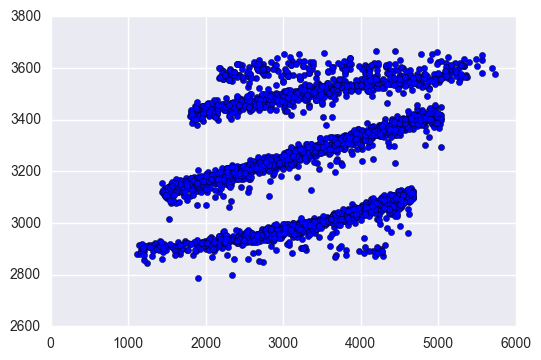

In [30]:
plt.scatter(y_test , predictions)

In [70]:
# make a new catagerocal column for ids that have run in 2016 and atleast 1 more marathon
def ran_2016_and_more():
    return df[(df.year == 2016) & (df.run_count > 1 )].id
unique_ids = ran_2016_and_more()
unique_list = unique_ids.tolist()


In [75]:
array = []
for id in df.id.tolist():
    if id in unique_list:
        array.append(True)
    else:
        array.append(False)

array

[False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False

In [76]:
df['new column'] = array

In [77]:
df.rename(columns={'new column': 'ran_2016_and_others'}, inplace=True)

In [81]:
df_refined =  df[df.ran_2016_and_others == True]

In [82]:
df_refined

,Unnamed: 0,id,name,age,rank,time,pace,year,male,ignore,run_count,years_since_run,time_in_secs,ran_2016_and_others
5,5,5,marcela todd,40,2608,05:28:34,12:33,2016,0,False,8,2,3514,True
6,6,5,marcela todd,42,3086,05:43:14,13:06,2014,0,False,7,2,4394,True
7,7,5,marcela todd,38,2455,05:29:04,12:33,2010,0,False,4,1,3544,True
8,8,5,marcela todd,36,2343,05:28:49,12:33,2008,0,False,2,1,3529,True
9,9,5,marcela todd,37,2415,05:27:27,12:29,2009,0,False,3,1,3447,True
10,10,5,marcela todd,35,2002,05:26:12,12:27,2007,0,False,1,1,3372,True
11,11,5,marcela todd,39,3140,05:28:24,12:32,2011,0,False,5,1,3504,True
12,12,5,marcela todd,34,2013,05:29:32,12:34,2006,0,False,0,-1,3572,True
13,13,5,marcela todd,40,3329,05:28:35,12:32,2012,0,False,6,1,3515,True
18,18,9,daniel loebl,52,2023,04:49:36,11:03,2014,1,False,1,2,4416,True


In [85]:
df_refined.columns

Index([u'Unnamed: 0', u'id', u'name', u'age', u'rank', u'time', u'pace',
       u'year', u'male', u'ignore', u'run_count', u'years_since_run',
       u'time_in_secs', u'ran_2016_and_others'],
      dtype='object')

In [88]:
df_refined.drop('Unnamed: 0',axis=1,inplace=True)
df_refined.drop('name',axis=1,inplace=True)
df_refined.drop('time',axis=1,inplace=True)
df_refined.drop('pace',axis=1,inplace=True)
df_refined.drop('ignore',axis=1,inplace=True) # all false anyway
df_refined.drop('ran_2016_and_others',axis=1,inplace=True) # all true anyway

/Users/mahmoodhegazy/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mahmoodhegazy/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/mahmoodhegazy/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/m

In [98]:
df_refined_6years = df_refined[df_refined.year >= 2009]
df_refined_6years_no_2016 = df_refined_6years[df_refined_6years.year != 2016]
df_refined_6years_2016 = df_refined_6years[df_refined_6years.year == 2016]


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#X = df_4years[['age', 'rank','run_count']]
#y = df_4years['time_in_secs']
#X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state = 101)

#create rand dist for dfs
msk = np.random.rand(len(df_refined_6years)) < 0.7
train = df_refined_6years[msk]
test = df_refined_6years[~msk]

#INPUT
df_refined_6years_no_2016_train = train[train.year != 2016] #x train
df_refined_6years_2016_train = train[train.year == 2016]  # x test

#Output
df_refined_6years_no_2016_test = test[test.year != 2016] #y train
df_refined_6years_2016_test = test[test.year == 2016]   # y test

#now build model
X_train = df_refined_6years_no_2016_train[['age', 'rank','run_count']]
X_test = df_refined_6years_2016_test[['age', 'rank','run_count']]
y_train = df_refined_6years_no_2016_train['time_in_secs']
y_test = df_refined_6years_2016_test['time_in_secs']

lm_2  = LinearRegression()
lm_2.fit(X_train,y_train)
# create df out of coeffecients
cdf = pd.DataFrame(lm_2.coef_ , X_train.columns , columns = ['Coeff'])
#predict
predictions = lm_2.predict(X_test)
cdf

,Coeff
age,5.065643
rank,0.255530
run_count,-17.521159


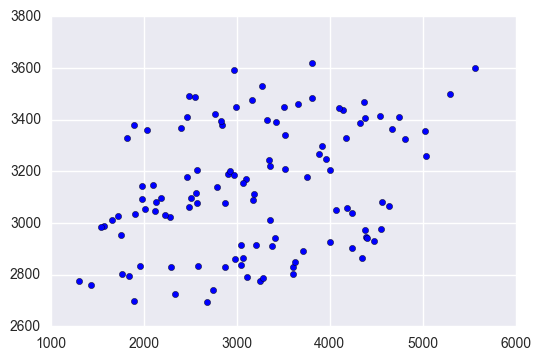

In [104]:
plt.scatter(y_test , predictions)

In [105]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 777.16214298281761)
('MSE:', 851389.2467774367)
('RMSE:', 922.70756297834509)


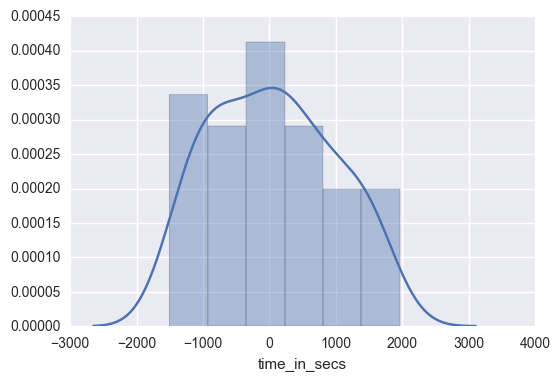

In [106]:
sns.distplot((y_test - predictions))

In [108]:
predictions.min()

2693.6623369521485